# Data Cleaning (Cleansing)

The process of correcting or removing corrupt/inaccurate
data from a dataset. Data cleaning refers to identifying the incomplete, incorrect, inaccurate, or irrelevant part of data and replacing, modifying, or deleting the dirty data.

## This notebook includes techniques on how to find and clean:

- Missing Data
- Irregular Data. Such as outliers.
- Repetitive data, duplicates, unnecessary data
- Inconsistent Data. Capitalization, Addrresses. 

## 0.0 About the data

For this notebook we will use the **Russian housing dataset** and an **anthropological dataset** that contains information about countries. 

In [4]:
# allows surpression of warnings
import warnings
warnings.filterwarnings("ignore")

# import datasets
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
# set desired size for figure size
matplotlib.rcParams['figure.figsize'] = (12, 8) 

pd.options.mode.chained_assignment = None

In [5]:
HOUSE_LOCATION = "./datasets/russian_house_market/house.csv"

In [6]:
df = pd.read_csv(HOUSE_LOCATION)

### 0.1 Shape

Figuring out the size of a dataset is a good start to data cleaning.
This tells use how many rows and columns exists in the dataset. 

In [7]:
# returns a tuple format (x, y)
# x is the number of rows
# y is the number of columns
df.shape

(38133, 293)

### 0. 2 Data types
Another useful type of information is the data type of each column or feature. This helps us identify which features are number or categorical.

In [8]:
df.dtypes

 id                   float64
timestamp              object
full_sq               float64
life_sq               float64
floor                 float64
                       ...   
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
id                    float64
price_doc             float64
Length: 293, dtype: object

### 0.3 Separating
Lets take a look at an example that shows us how to separate numerical and categorical features from each other.

In [9]:
# select_dtypes allows to include the datatype 
# df_numeric only contains features of the type np.number
df_numeric = df.select_dtypes(include=[np.number])
# store numeric features
numeric_cols = df_numeric.columns.values

In [10]:
# take a peek into the first 5 samples
df_numeric.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,id,price_doc
0,30474.0,39.0,20.7,2.0,9.0,1.0,1998.0,1.0,8.9,3.0,...,0,0,1,10,1,0,14,1,NaN,NaN
1,30475.0,79.2,NaN,8.0,17.0,1.0,0.0,3.0,1.0,1.0,...,1,0,2,11,0,1,12,1,NaN,NaN
2,30476.0,40.5,25.1,3.0,5.0,2.0,1960.0,2.0,4.8,2.0,...,4,0,10,21,0,10,71,11,NaN,NaN
3,30477.0,62.8,36.0,17.0,17.0,1.0,2016.0,2.0,62.8,3.0,...,2,0,0,10,0,0,2,0,NaN,NaN
4,30478.0,40.0,40.0,17.0,17.0,1.0,0.0,1.0,1.0,1.0,...,1,0,2,12,0,1,11,1,NaN,NaN


In [11]:
# select_dtypes also allows for exlusion of a datatype
# df_non_numeric contains features that are not np.number
df_non_numeric = df.select_dtypes(exclude=[np.number])
# store non number features
non_numeric_cols = df_non_numeric.columns.values

In [12]:
# take a peek into the first 5 samples
df_non_numeric.head()

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,2015-07-01,Investment,Juzhnoe Butovo,no,no,no,no,no,no,no,no,no,no,no,no,satisfactory
1,2015-07-01,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
2,2015-07-01,Investment,Perovo,no,yes,no,yes,yes,no,no,no,no,no,no,no,poor
3,2015-07-01,OwnerOccupier,Poselenie Voskresenskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
4,2015-07-01,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data


## 1.0 Visualizing Missing Data

Lets explore how we can deal with missing data. Dealing with missing data is by far the most important part of data cleaning. 

Most models do not accept missing data.

### 1. 1 Heatmap

When dealing with a small number of features, we can visualize the meissing data with a heatmap. 

The heatmap below shows the missing data pattern for the first 20 features. 

The horizontal axis shows the feature name.
The vertical axis represents the number of rows

The green represents missing values.

If we look at the first value in the "id" feature in the horizontal axis, 
we see that many observations are missing their respective "id". 

<AxesSubplot:>

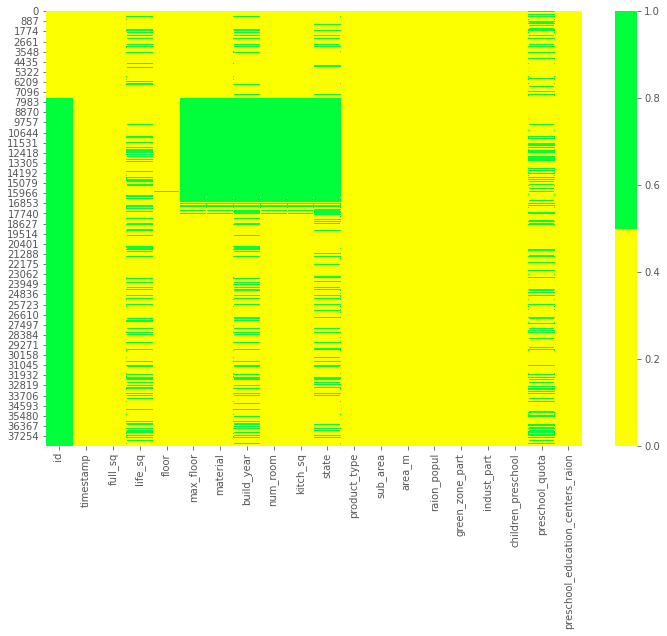

In [18]:
# get the first 20 columns
cols = df.columns[:20]
colors = ['#fbff00', '#00ff3b']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors)) 

### 1.2 Percentage List

Lets create list that tells us the percent of missing data for each particular feature.

In [20]:
# for large datasets, this could take a long time. 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

 id - 80%
timestamp - 0%
full_sq - 0%
life_sq - 20%
floor - 0%
max_floor - 25%
material - 25%
build_year - 38%
num_room - 25%
kitch_sq - 25%
state - 37%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 22%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 22%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 47%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female -

### 1.3 Histogram

Another way to visualize missing data is a histogram.
The histogram allows us to identify the missing values among all observations

<AxesSubplot:xlabel='index'>

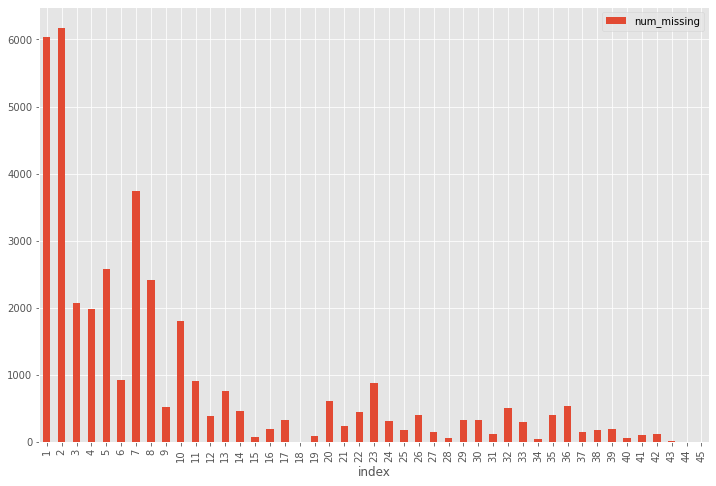

In [27]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

## 2.0 Dealing With Missing Data

Depending on the dataset that you're analyzing, you'll have to decide which technique works best for dealing with the dataset.

Though there is one size fits all answer, studying/analysing the data can provide nuances that can help you decide. 

### 2.1 Obsevation Dropping

If an observation contains missing values, dropping the entire observation is a simple option. 

If you are sure that the observation does not provide any unique insight, you can drop it.

We can set a threshold that drop observations that contain more than X number of missing values

df_less_missing_rows has observations with over 35 missing features

In [28]:
idx_missing = df[df['num_missing'] > 30].index
df_less_missing_rows = df.drop(idx_missing, axis=0)

In [29]:
df_less_missing_rows.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,id_ismissing,price_doc_ismissing
0,30474.0,2015-07-01,39.0,20.7,2.0,9.0,1.0,1998.0,1.0,8.9,...,False,False,False,False,False,False,False,False,True,True
1,30475.0,2015-07-01,79.2,NaN,8.0,17.0,1.0,0.0,3.0,1.0,...,False,False,False,False,False,False,False,False,True,True
2,30476.0,2015-07-01,40.5,25.1,3.0,5.0,2.0,1960.0,2.0,4.8,...,False,False,False,False,False,False,False,False,True,True
3,30477.0,2015-07-01,62.8,36.0,17.0,17.0,1.0,2016.0,2.0,62.8,...,False,False,False,False,False,False,False,False,True,True
4,30478.0,2015-07-01,40.0,40.0,17.0,17.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,True


### 2.2 Feature Dropping

Another alternative is dropping the entire feature.

In [31]:
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

In [32]:
df_less_hos_beds_raion.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,id_ismissing,price_doc_ismissing
0,30474.0,2015-07-01,39.0,20.7,2.0,9.0,1.0,1998.0,1.0,8.9,...,False,False,False,False,False,False,False,False,True,True
1,30475.0,2015-07-01,79.2,NaN,8.0,17.0,1.0,0.0,3.0,1.0,...,False,False,False,False,False,False,False,False,True,True
2,30476.0,2015-07-01,40.5,25.1,3.0,5.0,2.0,1960.0,2.0,4.8,...,False,False,False,False,False,False,False,False,True,True
3,30477.0,2015-07-01,62.8,36.0,17.0,17.0,1.0,2016.0,2.0,62.8,...,False,False,False,False,False,False,False,False,True,True
4,30478.0,2015-07-01,40.0,40.0,17.0,17.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,True
